# 0.0 - Import Biblioteca

In [ ]:
# Importando bibliotecas
import pandas as pd

# Lib para avisos
import warnings
warnings.filterwarnings('ignore')

# Lib para visualização 

import matplotlib.pyplot as plt
import seaborn as sns


#1.0 - Extração dos dados


## 1.1 - Extração

In [ ]:
# Carregando dos dados
tabela_sites = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal')

print(f'foi localizado: {len (tabela_sites)} tabelas')

foi localizado: 11 tabelas


In [ ]:
# Separando as tabelas

pib_2020 = tabela_sites[3]
pib_2018 = tabela_sites[4]
pib_2014 = tabela_sites[5]

# Dimensão das tabelas

print((pib_2020.shape), (pib_2018.shape), (pib_2014.shape))


(196, 3) (190, 3) (212, 3)


## 1.2 - Tratamento - Dados

In [ ]:
# Verificando dados nulos

pib_2020.isnull().sum()

Posição                  5
País                     0
PIB (Trilhões de US$)    1
dtype: int64

In [ ]:
# Filtrando campos nulos

pib_2020 = pib_2020.loc[pib_2020['Posição'].notnull()]

In [ ]:
pib_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580250.0
3,2,China,14860775.0
4,3,Japão,4910580.0
5,4,Alemanha,3780553.0
6,5,Reino Unido,2638296.0


In [ ]:
pib_2020.tail()

# Retornou um traço na posição (É preciso modelar para não prejudicar o andamento do projeto)

,Posição,País,PIB (Trilhões de US$)
191,186,Ilhas Marshall,214.0
192,187,Kiribati,189.0
193,188,Nauru,112.0
194,189,Tuvalu,42.0
195,—,Síria,NaN


In [ ]:
# Colunas e Index

pib_2020.columns

# Verificando index

pib_2020.index

Int64Index([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            186, 187, 188, 189, 190, 191, 192, 193, 194, 195],
           dtype='int64', length=191)

In [ ]:
# Informações dos dados

pib_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 195
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Posição                191 non-null    object 
 1   País                   191 non-null    object 
 2   PIB (Trilhões de US$)  190 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [ ]:
# Existência de campos duplicados

pib_2020.duplicated().sum()

0

In [ ]:
# Describe

pib_2020.describe()

# O Retorno de valor exponencial de certa forma prejudica o entendimento de imediato.
# É mais adequado fazer o redimensionamento dos valores multiplicando por 100

,PIB (Trilhões de US$)
count,1.900000e+02
mean,4.387746e+05
std,1.913031e+06
min,4.200000e+01
25%,7.983500e+03
50%,3.631400e+04
75%,2.360055e+05
max,2.058025e+07


In [ ]:
# Redimensar os valores

pib_2020['PIB (Trilhões de US$)'] = pib_2020['PIB (Trilhões de US$)'] / 1000

# Novo desbribe

pib_2020.describe()


,PIB (Trilhões de US$)
count,190.000000
mean,438.774563
std,1913.031374
min,0.042000
25%,7.983500
50%,36.314000
75%,236.005500
max,20580.250000




---



---



### REPORT ERRO

In [ ]:
# Convertendo dtype da coluna "Posição"

# pib_2020['Posição'] = pib_2020['Posição'].astype('int64')

# Retornou o ValueError: invalid literal for int() with base 10: '—':
# Impossível fazer a conversão por conta de um caracter do tipo 'string'.
# É preciso encontrar '—' e fazer a substituição



---



In [ ]:
# Substituir a informação

# Acessar o index

pib_2020.loc[ pib_2020['Posição'] == '—' ].index

Int64Index([165, 195], dtype='int64')

In [ ]:
# Substituindo por 1

pib_2020.iloc[165,0] = 1

In [ ]:
# Excluindo o traço

pib_2020 = pib_2020.loc[ pib_2020['Posição'] != '—' ]

In [ ]:
# Nova tentativa de conversão 

pib_2020['Posição'] = pib_2020['Posição'].astype('int64')

# Novo info

pib_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 194
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Posição                189 non-null    int64  
 1   País                   189 non-null    object 
 2   PIB (Trilhões de US$)  189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


## 1.3 - Tratamento - Organização do Dataset

In [ ]:
# Ordenando pela 'Posição' de forma decresente

pib_2020.sort_index ( ascending=False)

pib_2020['Posição'].sort_values( ascending= False)

194    189
193    188
192    187
191    186
190    185
      ... 
5        4
4        3
3        2
170      1
1        1
Name: Posição, Length: 189, dtype: int64

In [ ]:
# Resetando o Index

pib_2020.reset_index( drop=True )

,Posição,País,PIB (Trilhões de US$)
0,1,Estados Unidos,20580.250
1,2,China,14860.775
2,3,Japão,4910.580
3,4,Alemanha,3780.553
4,5,Reino Unido,2638.296
...,...,...,...
184,185,Palau,0.284
185,186,Ilhas Marshall,0.214
186,187,Kiribati,0.189
187,188,Nauru,0.112


In [ ]:
# Excluindo coluna 'Posição'

pib_2020.drop( columns = 'Posição')

,País,PIB (Trilhões de US$)
1,Estados Unidos,20580.250
3,China,14860.775
4,Japão,4910.580
5,Alemanha,3780.553
6,Reino Unido,2638.296
...,...,...
190,Palau,0.284
191,Ilhas Marshall,0.214
192,Kiribati,0.189
193,Nauru,0.112


In [ ]:
pib_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Renomeando colunas

pib_2020.rename(columns = {'PIB (Trilhões de US$)': '2020'}, inplace = True)

pib_2020.head()

,Posição,País,2020
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Função para classificar entre "acima" e "abaixo"

# Calculo da média

media = pib_2020['2020'].mean()

# Função

def classe_media (dados):

  if dados['2020'] >= media:
    return 'acima'
  else:
    return 'abaixo'
pib_2020['Classe'] = pib_2020.apply(classe_media, axis = 1)

pib_2020.head()


,Posição,País,2020,Classe
1,1,Estados Unidos,20580.250,acima
3,2,China,14860.775,acima
4,3,Japão,4910.580,acima
5,4,Alemanha,3780.553,acima
6,5,Reino Unido,2638.296,acima


In [ ]:
# Agrupando e analisando a classe criada

pib_2020.groupby(['Classe']).count()

,Posição,País,2020
Classe,,,
abaixo,161,161,161
acima,28,28,28


In [ ]:
# Agrupando e analisando a classe criada

pib_2020.groupby(['Classe','Posição']).count()

País  2020
Classe Posição            
abaixo 1           1     1
       29          1     1
       30          1     1
       31          1     1
       32          1     1
...              ...   ...
acima  24          1     1
       25          1     1
       26          1     1
       27          1     1
       28          1     1

[189 rows x 2 columns]

### 1.3.1 - Organizando o dataset pib_2018

In [ ]:
# Verificando a igualdade de colunas entre os dataset

tabela_sites[3].columns == pib_2018.columns

# Retornou como false, a mudança no nome 'PIB (Millhões de US$)'
# Logo para executar o empilhamento entre dataset, precisamos ter os mesmos nomes de colunas e quantidade

# Dropando a coluna 'Classe' do pib_2020

novo_pib_2020 = pib_2020.drop( columns='Classe' )

# Alterando o nome da coluna do dataset pib_2018

novo_pib_2018 = pib_2018.rename( columns={'PIB (Millhões de US$)' : '2020'} )

# Nova verificação de igualdade de colunas

novo_pib_2020.columns == novo_pib_2018.columns

array([ True,  True,  True])

In [ ]:
# Empilhamento de dados entre dataset

pd.concat( [novo_pib_2020, novo_pib_2018] )

,Posição,País,2020
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296
...,...,...,...
185,181,Palau,NaN
186,182,Ilhas Marshall,NaN
187,183,Kiribati,NaN
188,184,Nauru,NaN


In [ ]:
# Criando um unico dataset cruzando os dados

db_cruzada = pd.merge(novo_pib_2020, novo_pib_2018, how = 'inner', on = ['País'])

# Verificando o head e tail
db_cruzada.head()

db_cruzada.tail()

# Info
db_cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Posição_x  178 non-null    int64  
 1   País       178 non-null    object 
 2   2020_x     178 non-null    float64
 3   Posição_y  178 non-null    object 
 4   2020_y     0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.3+ KB


In [ ]:
db_cruzada['Posição_y'].value_counts()

1      1
—      1
119    1
120    1
121    1
      ..
64     1
66     1
65     1
67     1
185    1
Name: Posição_y, Length: 178, dtype: int64

In [ ]:
# Identificando e excluindo '—'

db_cruzada = db_cruzada.loc[ db_cruzada['Posição_y'] != '—' ]

# Conversão para int64 a coluna 'Posução_y'

db_cruzada['Posição_y'] = pd.to_numeric( db_cruzada['Posição_y'] )

# Criação da coluna 'Subiu ou Caiu', com a diferença entre posição de 2018 e 2020.

db_cruzada['Subiu ou Caiu'] = db_cruzada['Posição_y'] - db_cruzada['Posição_x']

db_cruzada.head()


,Posição_x,País,2020_x,Posição_y,2020_y,Subiu ou Caiu
0,1,Estados Unidos,20580.250,1,NaN,0
1,2,China,14860.775,2,NaN,0
2,3,Japão,4910.580,3,NaN,0
3,4,Alemanha,3780.553,4,NaN,0
4,5,Reino Unido,2638.296,5,NaN,0


In [ ]:
db_cruzada.groupby(['Subiu ou Caiu']).count()

,Posição_x,País,2020_x,Posição_y,2020_y
Subiu ou Caiu,,,,,
-14,1,1,1,1,0
-8,1,1,1,1,0
-6,1,1,1,1,0
-5,6,6,6,6,0
-4,32,32,32,32,0
-3,10,10,10,10,0
-2,28,28,28,28,0
-1,59,59,59,59,0
0,30,30,30,30,0


# 2.0 - Visualizações

In [ ]:
db_cruzada.head()

,Posição_x,País,2020_x,Posição_y,2020_y,Subiu ou Caiu
0,1,Estados Unidos,20580.250,1,NaN,0
1,2,China,14860.775,2,NaN,0
2,3,Japão,4910.580,3,NaN,0
3,4,Alemanha,3780.553,4,NaN,0
4,5,Reino Unido,2638.296,5,NaN,0


In [ ]:
# Criando variável analise_ranking

analise_ranking = db_cruzada[['País', '2020_x', 'Subiu ou Caiu']]

analise_ranking.head()

,País,2020_x,Subiu ou Caiu
0,Estados Unidos,20580.250,0
1,China,14860.775,0
2,Japão,4910.580,0
3,Alemanha,3780.553,0
4,Reino Unido,2638.296,0


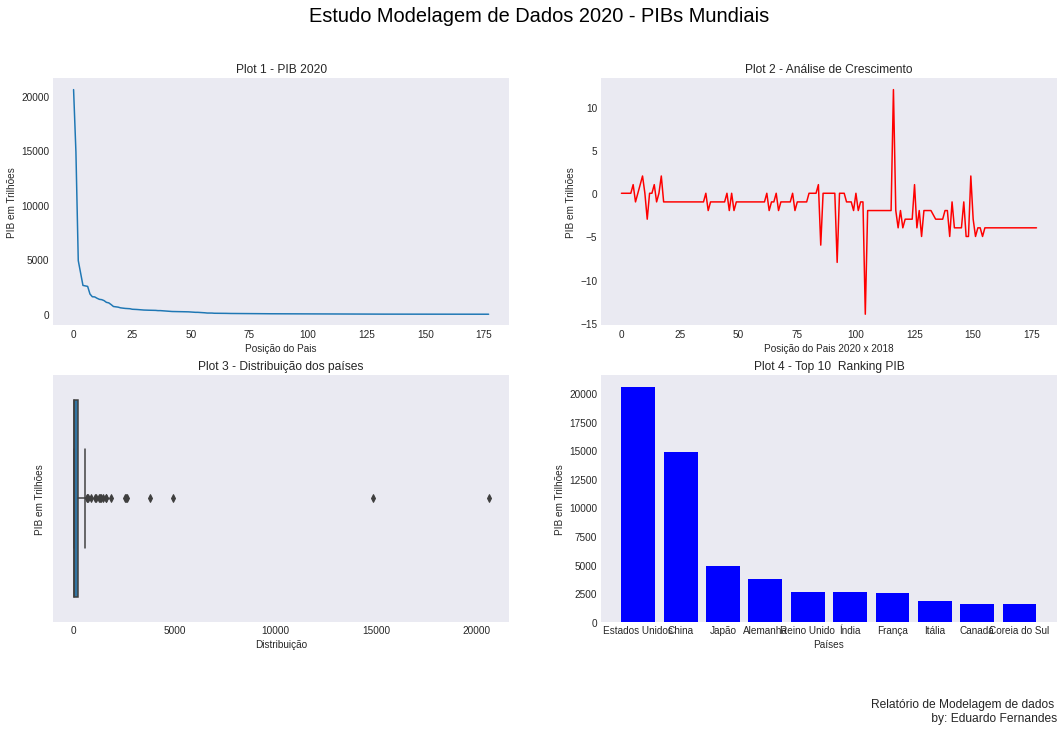

In [ ]:
# Criando o Relatorio

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

# Dividor o relatorio
plt.subplot(2, 2, 1)
plt.title('Plot 1 - PIB 2020')
plt.plot( analise_ranking['2020_x'] )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Posição do Pais')

plt.subplot(2, 2, 2)
plt.title('Plot 2 - Análise de Crescimento')
plt.plot( analise_ranking['Subiu ou Caiu'], color='red' )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Posição do Pais 2020 x 2018')

plt.subplot(2, 2, 3)
plt.title('Plot 3 - Distribuição dos países')
sns.boxplot( analise_ranking['2020_x'] )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Distribuição')

plt.subplot(2, 2, 4)
plt.bar( analise_ranking['País'][0:10], analise_ranking['2020_x'][0:10], color='blue' )
plt.title('Plot 4 - Top 10  Ranking PIB')
plt.ylabel('PIB em Trilhões')
plt.xlabel('Países')

plt.suptitle('Estudo Modelagem de Dados 2020 - PIBs Mundiais', fontsize=20, color='black')

plt.annotate(
    'Relatório de Modelagem de dados \n by: Eduardo Fernandes',
    xy=(1, -0.40), xycoords='axes fraction', ha='right', fontsize=12
);